# Uber Trip Data EDA
This notebook performs exploratory data analysis (EDA) on Uber trip data from April 2014.

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set visualization style
sns.set(style="whitegrid")


In [21]:
# Load the dataset
df = pd.read_csv("Uber-Jan-Feb-FOIL.csv")

# Preview the dataset
df.head()


,dispatching_base_number,date,active_vehicles,trips
0,B02512,1/1/2015,190,1132
1,B02765,1/1/2015,225,1765
2,B02764,1/1/2015,3427,29421
3,B02682,1/1/2015,945,7679
4,B02617,1/1/2015,1228,9537


In [23]:
# Convert date/time column to datetime object
df['date'] = pd.to_datetime(df['date'])

# Create new time-based columns
df['Hour'] = df['date'].dt.hour
df['Day'] = df['date'].dt.day
df['Weekday'] = df['date'].dt.weekday
df['Month'] = df['date'].dt.month

C:\Users\rp878\AppData\Local\Temp\ipykernel_13308\497648199.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Hour', data=df, palette='viridis')


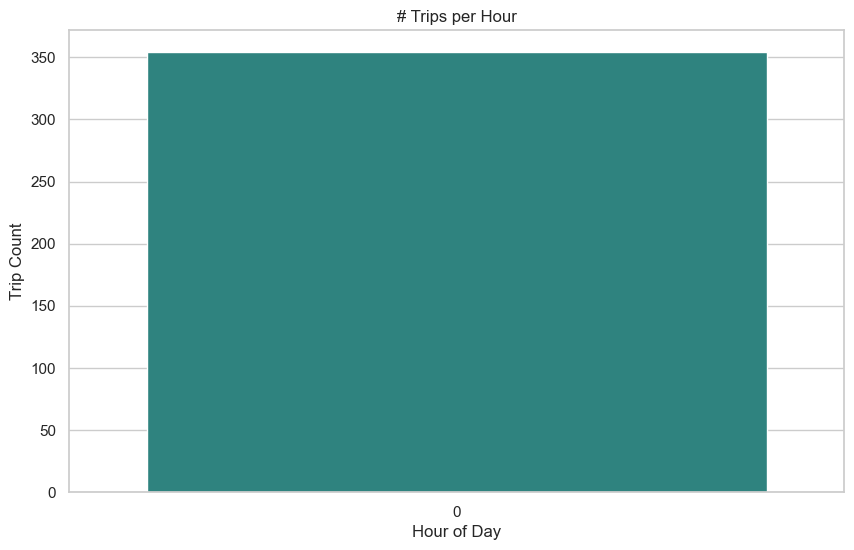

In [25]:
# # Trips per Hour
plt.figure(figsize=(10, 6))
sns.countplot(x='Hour', data=df, palette='viridis')
plt.title("# Trips per Hour")
plt.xlabel("Hour of Day")
plt.ylabel("Trip Count")
plt.show()


C:\Users\rp878\AppData\Local\Temp\ipykernel_13308\1408615207.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Day', data=df, palette='coolwarm')


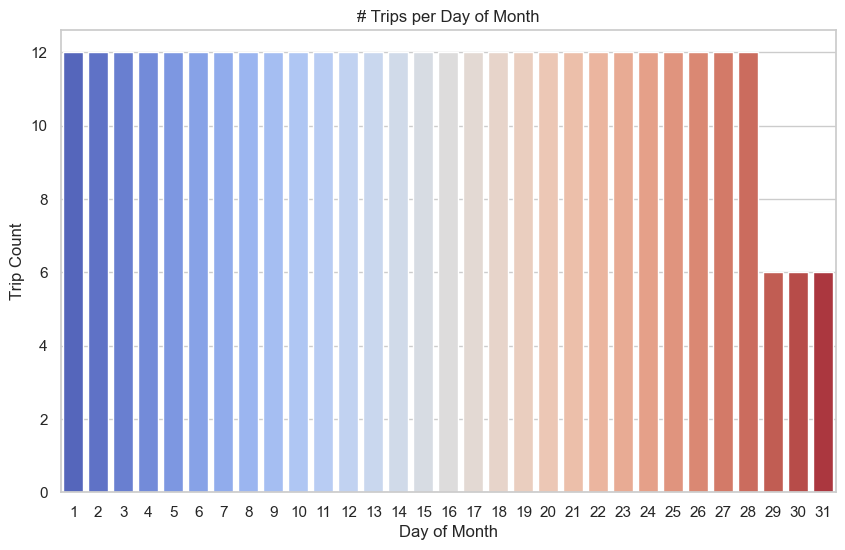

In [29]:
# # Trips per Day of Month
plt.figure(figsize=(10, 6))
sns.countplot(x='Day', data=df, palette='coolwarm')
plt.title("# Trips per Day of Month")
plt.xlabel("Day of Month")
plt.ylabel("Trip Count")
plt.show()


C:\Users\rp878\AppData\Local\Temp\ipykernel_13308\3178282477.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Weekday', data=df, palette='Set2')


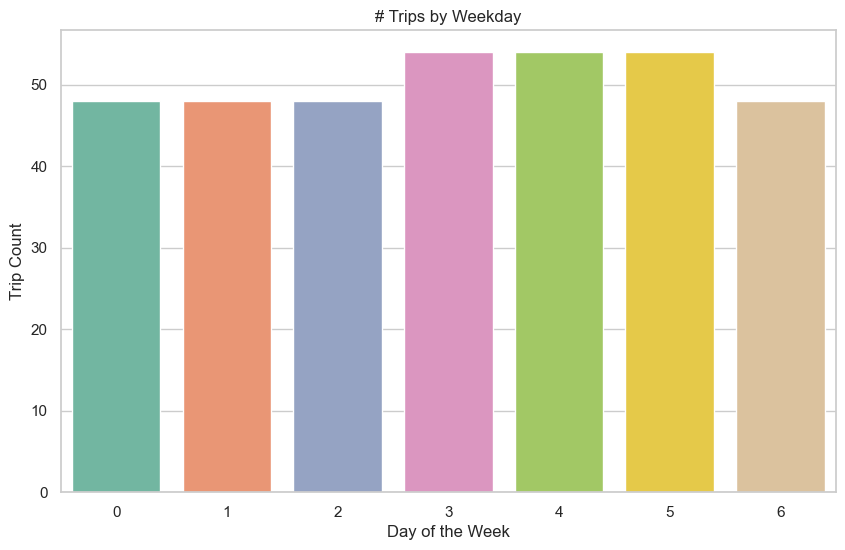

In [31]:
# # Trips by Weekday
plt.figure(figsize=(10, 6))
sns.countplot(x='Weekday', data=df, palette='Set2')
plt.title("# Trips by Weekday")
plt.xlabel("Day of the Week")
plt.ylabel("Trip Count")
plt.show()


C:\Users\rp878\AppData\Local\Temp\ipykernel_13308\685897677.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='dispatching_base_number', data=df, palette='Set1')


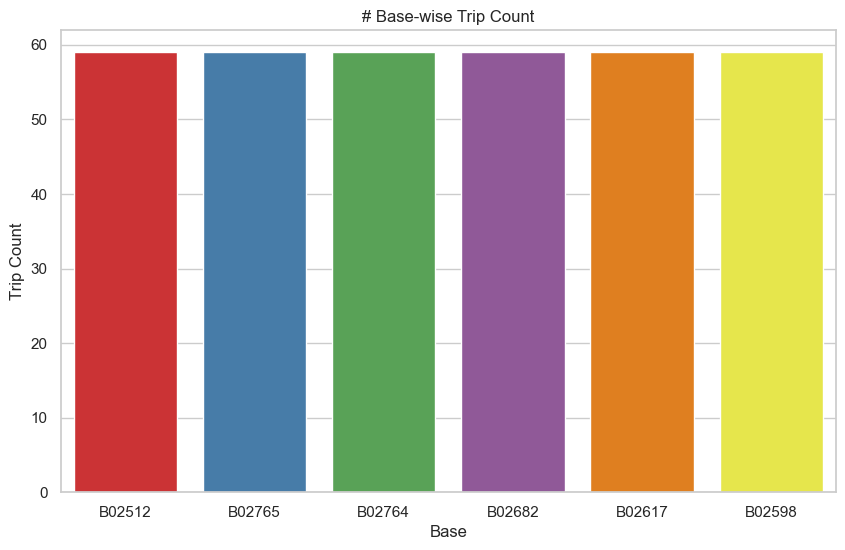

In [37]:
# # Base-wise Trip Count
plt.figure(figsize=(10, 6))
sns.countplot(x='dispatching_base_number', data=df, palette='Set1')
plt.title("# Base-wise Trip Count")
plt.xlabel("Base")
plt.ylabel("Trip Count")
plt.show()


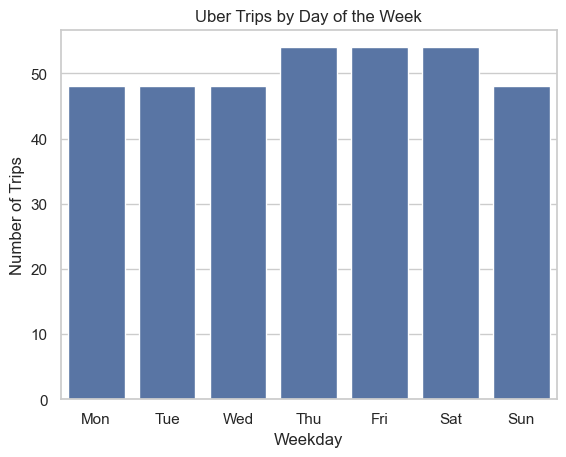

In [27]:
weekdays = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
weekday_counts = df['Weekday'].value_counts().sort_index()

sns.barplot(x=weekdays, y=weekday_counts.values)
plt.title("Uber Trips by Day of the Week")
plt.xlabel("Weekday")
plt.ylabel("Number of Trips")
plt.show()

In [41]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [43]:
df['date'] = pd.to_datetime(df['date'])
df['day'] = df['date'].dt.day
df['month'] = df['date'].dt.month

In [45]:

# Features and target
X = df[['dispatching_base_number', 'active_vehicles', 'day', 'month']]
y = df['trips']


In [53]:
y

0       1132
1       1765
2      29421
3       7679
4       9537
       ...  
349    39812
350    14022
351    14472
352     1803
353     7753
Name: trips, Length: 354, dtype: int64

In [55]:
X

,dispatching_base_number,active_vehicles,day,month
0,B02512,190,1,1
1,B02765,225,1,1
2,B02764,3427,1,1
3,B02682,945,1,1
4,B02617,1228,1,1
...,...,...,...,...
349,B02764,3952,28,2
350,B02617,1372,28,2
351,B02682,1386,28,2
352,B02512,230,28,2


In [57]:

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [59]:
# Preprocessing: One-hot encode the base
preprocessor = ColumnTransformer([
    ('onehot', OneHotEncoder(handle_unknown='ignore'), ['dispatching_base_number'])
], remainder='passthrough')  # Keep other columns as is

In [61]:
model = Pipeline([
    ('preprocess', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))
])

In [63]:
# Train model
model.fit(X_train, y_train)

C:\Users\rp878\anaconda3\Lib\site-packages\sklearn\compose\_column_transformer.py:1623: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('preprocess',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehot',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['dispatching_base_number'])])),
                ('regressor', RandomForestRegressor(random_state=42))])

In [65]:
# Evaluate
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")

Mean Squared Error: 4254594.63


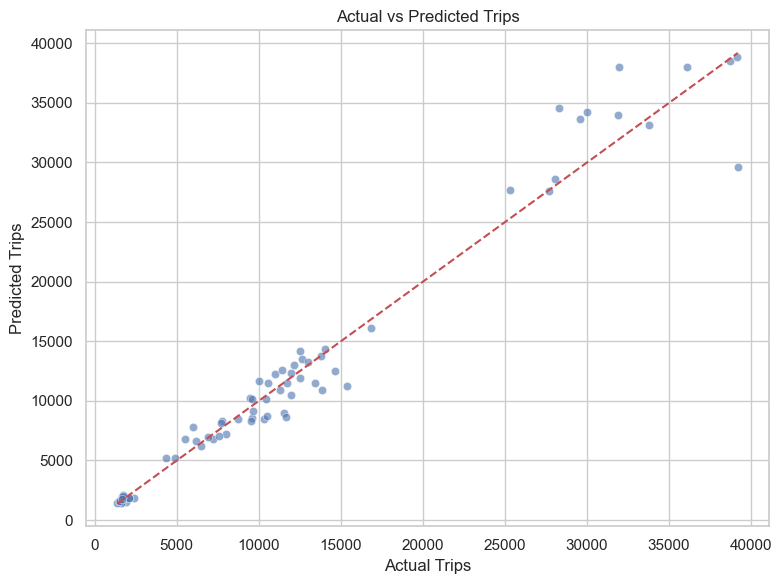

In [69]:
# 8. Visualization: Actual vs Predicted
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
plt.xlabel("Actual Trips")
plt.ylabel("Predicted Trips")
plt.title("Actual vs Predicted Trips")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Diagonal reference line
plt.tight_layout()
plt.show()

In [71]:
pip install xgboost

In [73]:
from xgboost import XGBRegressor

# XGBoost model
xgb_model = Pipeline([
    ('preprocess', preprocessor),
    ('regressor', XGBRegressor(n_estimators=100, random_state=42))
])

# Train and evaluate
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
print(f"XGBoost MSE: {mse_xgb:.2f}")

XGBoost MSE: 2722374.64


In [77]:
from sklearn.linear_model import LinearRegression

# Replace the model in the pipeline
linear_model = Pipeline([
    ('preprocess', preprocessor),
    ('regressor', LinearRegression())
])

# Train and evaluate
linear_model.fit(X_train, y_train)
y_pred_lr = linear_model.predict(X_test)
mse_lr = mean_squared_error(y_test, y_pred_lr)
print(f"Linear Regression MSE: {mse_lr:.2f}")


Linear Regression MSE: 2874902.85


C:\Users\rp878\AppData\Local\Temp\ipykernel_13308\3522186944.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=models, y=mses, palette='Set2')


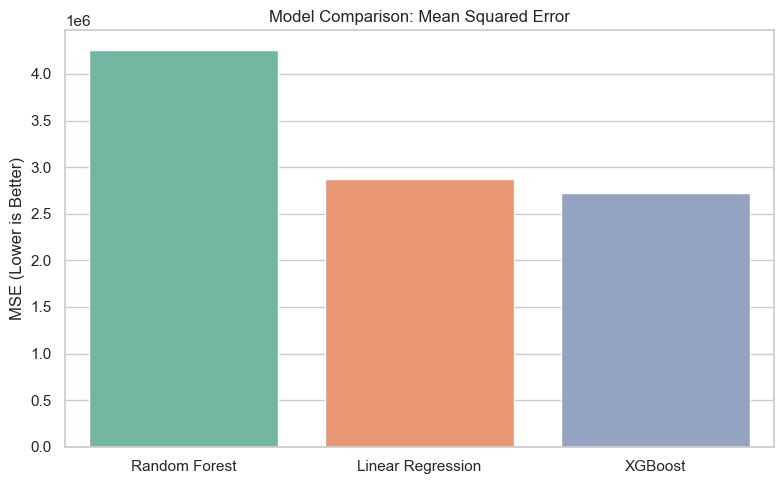

In [79]:
models = ['Random Forest', 'Linear Regression', 'XGBoost']
mses = [mse, mse_lr, mse_xgb]

plt.figure(figsize=(8, 5))
sns.barplot(x=models, y=mses, palette='Set2')
plt.title("Model Comparison: Mean Squared Error")
plt.ylabel("MSE (Lower is Better)")
plt.tight_layout()
plt.show()
